# Data Generation and Augmentation

## Table of Contents

1. Introduction
2. Examples
3. References and Further Reading


<a id='introduction'></a>

## 1. Introduction

Generative AI can be used for data generation and augmentation in several ways, particularly in creating realistic synthetic data based on specific situations:

1. Creating realistic synthetic datasets
2. Augmenting existing data with additional attributes
3. Generating data patterns based on given prompts
4. Filling in missing data points
5. Simulating various scenarios for testing and analysis
6. Creating diverse datasets: Gen AI can generate a wide range of data points that mimic real-world scenarios.
7. Augmenting existing datasets: It can add variations to existing data, increasing dataset size and diversity.
8. Generating rare or edge cases: AI can create data for uncommon scenarios that are hard to collect naturally.
9. Preserving privacy: Synthetic data can be used instead of sensitive real data for testing and development.
10. Balancing datasets: Gen AI can create additional samples for underrepresented classes in imbalanced datasets.

Using Gen AI for synthetic data creation offers several benefits:

- Overcoming data scarcity
- Protecting privacy by avoiding real user data
- Creating diverse datasets for robust model training
- Simulating rare events or edge cases
- Rapid prototyping and testing of data-driven systems
- Increases dataset size, improving model performance.
- Enhances dataset diversity, reducing bias.
- Saves time compared to manual data collection.
- Allows exploration of 'what-if' scenarios.

Key terminology:

- Synthetic Data: Artificially generated data that mimics real-world data
- Data Augmentation: Techniques to increase the amount and diversity of data
- Prompt: A text input that guides the AI in generating specific types of data
- Pattern: A repeating structure or trend in the data that the AI can learn and replicate

For data engineers, Gen AI-based synthetic data creation can be particularly helpful in:

- Testing data pipelines with diverse and large-scale datasets
- Developing and validating data models without risking real, sensitive data
- Creating representative datasets for machine learning model training
- Simulating various data scenarios for system stress testing


In [1]:
import pandas as pd
import json
import os
from openai import OpenAI
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from dotenv import load_dotenv, find_dotenv
from rich.console import Console

In [2]:
console = Console()

load_dotenv(find_dotenv())
OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
console.print(f"[dark_orange]Using OpenAI API key: {OPENAI_API_KEY[:12]}[/]")
# Set up OpenAI API key
client = OpenAI(api_key=OPENAI_API_KEY)

Using OpenAI API key: sk-proj-LRO5

In [3]:
def get_first_value(dict_variable):
    """The function clean takes a dictionary (dict_variable) as input and returns the value of the first key-value pair in the dictionary.

    Here's a breakdown:

    iter(dict_variable.values()) creates an iterator over the dictionary's values.
    next(...) retrieves the first value from the iterator.
    So, if you have a dictionary like {'a': 1, 'b': 2, 'c': 3}, calling clean on it would return 1, which is the value associated with the first key 'a'.

    Note that this function assumes the dictionary is not empty. If the dictionary is empty, next will raise a StopIteration exception.
    """
    return next(iter(dict_variable.values()))

In [4]:
# test our API call
completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": "tell me a slogan for an ice cream company. Return as a JSON object.",
        },
    ],
    response_format={"type": "json_object"},
)

In [5]:
n = json.loads(completion.choices[0].message.content)

In [6]:
get_first_value(n)

'Scoop into Happiness!'

<a id='example1'></a>

## 2. Example 1: Generating Synthetic Data


In [7]:
prompt = "Generate synthetic sales data for an e-commerce platform. Include fields for date, customer_id (Customer ###), order total (in $USD). For certain orders, the order total should be negative. Create data for 10 customers. Output in JSON form."

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

customer_data = json.loads(response.choices[0].message.content)
print(json.dumps(customer_data, indent=2))

{
  "sales_data": [
    {
      "date": "2023-01-01",
      "customer_id": "Customer 001",
      "order_total": 150.75
    },
    {
      "date": "2023-01-02",
      "customer_id": "Customer 002",
      "order_total": 200.5
    },
    {
      "date": "2023-01-03",
      "customer_id": "Customer 003",
      "order_total": -25.0
    },
    {
      "date": "2023-01-04",
      "customer_id": "Customer 004",
      "order_total": 75.0
    },
    {
      "date": "2023-01-05",
      "customer_id": "Customer 005",
      "order_total": 300.99
    },
    {
      "date": "2023-01-06",
      "customer_id": "Customer 006",
      "order_total": -10.99
    },
    {
      "date": "2023-01-07",
      "customer_id": "Customer 007",
      "order_total": 950.0
    },
    {
      "date": "2023-01-08",
      "customer_id": "Customer 008",
      "order_total": 125.25
    },
    {
      "date": "2023-01-09",
      "customer_id": "Customer 009",
      "order_total": 50.0
    },
    {
      "date": "2023-01-10",

In [8]:
# Convert to DataFrame
df_customers = pd.DataFrame(get_first_value(customer_data))
print(df_customers)

          date   customer_id  order_total
0   2023-01-01  Customer 001       150.75
1   2023-01-02  Customer 002       200.50
2   2023-01-03  Customer 003       -25.00
3   2023-01-04  Customer 004        75.00
4   2023-01-05  Customer 005       300.99
5   2023-01-06  Customer 006       -10.99
6   2023-01-07  Customer 007       950.00
7   2023-01-08  Customer 008       125.25
8   2023-01-09  Customer 009        50.00
9   2023-01-10  Customer 010        -5.50
10  2023-01-11  Customer 001       200.00
11  2023-01-12  Customer 002       150.25
12  2023-01-13  Customer 003       320.50
13  2023-01-14  Customer 004        -9.99
14  2023-01-15  Customer 005        75.00
15  2023-01-16  Customer 006       180.00
16  2023-01-17  Customer 007       120.75
17  2023-01-18  Customer 008       300.00
18  2023-01-19  Customer 009       400.00
19  2023-01-20  Customer 010       -15.00
20  2023-01-21  Customer 001       250.10
21  2023-01-22  Customer 002        80.00
22  2023-01-23  Customer 003      

In [9]:
prompt = """Generate 5 synthetic product reviews for a smartphone. Include fields for review_id, rating (1-5), and review_text. Output in JSON form."""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

review_data = json.loads(response.choices[0].message.content)
print(json.dumps(review_data, indent=2))

{
  "reviews": [
    {
      "review_id": "001",
      "rating": 5,
      "review_text": "I've been using this smartphone for a month now, and I absolutely love it! The camera quality is outstanding, capturing vibrant colors and sharp details. The battery life lasts all day, and the performance is lightning fast. Highly recommended!"
    },
    {
      "review_id": "002",
      "rating": 3,
      "review_text": "The smartphone has a sleek design and a nice display, but I've encountered some issues with the software. It tends to lag occasionally, and some apps crash. It's a decent phone, but I expected better performance for the price."
    },
    {
      "review_id": "003",
      "rating": 4,
      "review_text": "Great phone overall! The fingerprint sensor works perfectly, and the overall build quality feels premium. The only downside is that the charging speed could be improved. Otherwise, a solid choice for anyone looking for a reliable smartphone."
    },
    {
      "review_id": "

In [10]:
# Convert to DataFrame
df_reviews = pd.DataFrame(get_first_value(review_data))
print(df_reviews)

  review_id  rating                                        review_text
0       001       5  I've been using this smartphone for a month no...
1       002       3  The smartphone has a sleek design and a nice d...
2       003       4  Great phone overall! The fingerprint sensor wo...
3       004       1  I'm really disappointed with this smartphone. ...
4       005       2  The design of the phone is nice, but the batte...


<a id='example2'></a>

## 2. Example 2: Augmenting Existing Data


In [11]:
# Assuming we have an existing dataset
existing_data = pd.DataFrame(
    {
        "product": ["Laptop", "Smartphone"],
        "price": [1200, 800],
        "category": ["Electronics", "Electronics"],
    }
)
print("Existing Data:")
print(existing_data)

prompt = f"""Given this product data: {existing_data.to_dict('records')}, 
generate 3 additional products in the same format, maintaining similar patterns but with different values. Output in JSON form."""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

new_products = get_first_value(json.loads(response.choices[0].message.content))
print("\nGenerated New Products:")
print(json.dumps(new_products, indent=2))

Existing Data:
      product  price     category
0      Laptop   1200  Electronics
1  Smartphone    800  Electronics

Generated New Products:
[
  {
    "product": "Tablet",
    "price": 600,
    "category": "Electronics"
  },
  {
    "product": "Smartwatch",
    "price": 300,
    "category": "Electronics"
  },
  {
    "product": "Headphones",
    "price": 150,
    "category": "Electronics"
  }
]


In [12]:
print(pd.DataFrame(data=new_products))

      product  price     category
0      Tablet    600  Electronics
1  Smartwatch    300  Electronics
2  Headphones    150  Electronics


In [13]:
# Original dataset
original_data = [
    {"id": 1, "age": 25, "income": 50000},
    {"id": 2, "age": 40, "income": 75000},
]

print("Original data:")
print(json.dumps(original_data, indent=2))

Original data:
[
  {
    "id": 1,
    "age": 25,
    "income": 50000
  },
  {
    "id": 2,
    "age": 40,
    "income": 75000
  }
]


In [14]:
prompt = f"Generate 3 new data points similar to these, maintaining realistic relationships between age and income. Output in JSON form: {json.dumps(original_data)}"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

new_data = json.loads(response.choices[0].message.content)

augmented_data = original_data + get_first_value(new_data)

print("Augmented data:")
print(json.dumps(augmented_data, indent=2))

Augmented data:
[
  {
    "id": 1,
    "age": 25,
    "income": 50000
  },
  {
    "id": 2,
    "age": 40,
    "income": 75000
  },
  {
    "id": 3,
    "age": 30,
    "income": 60000
  },
  {
    "id": 4,
    "age": 45,
    "income": 90000
  },
  {
    "id": 5,
    "age": 35,
    "income": 70000
  }
]


In [15]:
pd.DataFrame(augmented_data).sort_values("age")

,id,age,income
0,1,25,50000
2,3,30,60000
4,5,35,70000
1,2,40,75000
3,4,45,90000


<a id='example3'></a>

## 2. Example 3: Creating Time Series Data


In [ ]:
prompt = "Generate synthetic daily sales data for a coffee shop for over 4 weeks, for product. Include date and total_sales. Show a realistic pattern with weekend peaks. Output in JSON form."

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

sales_data = json.loads(response.choices[0].message.content)
print(json.dumps(sales_data, indent=2))

In [ ]:
# Convert to DataFrame
df_sales = pd.DataFrame(get_first_value(sales_data))
df_sales["date"] = pd.to_datetime(df_sales["date"])
print(df_sales)

         date  total_sales
0  2023-09-25          320
1  2023-09-26          280
2  2023-09-27          310
3  2023-09-28          305
4  2023-09-29          400
5  2023-09-30          550
6  2023-10-01          600
7  2023-10-02          330
8  2023-10-03          290
9  2023-10-04          310
10 2023-10-05          315
11 2023-10-06          420
12 2023-10-07          580
13 2023-10-08          620
14 2023-10-09          340
15 2023-10-10          280
16 2023-10-11          300
17 2023-10-12          325
18 2023-10-13          430
19 2023-10-14          590
20 2023-10-15          660
21 2023-10-16          350
22 2023-10-17          290
23 2023-10-18          320
24 2023-10-19          335
25 2023-10-20          450
26 2023-10-21          600
27 2023-10-22          680
28 2023-10-23          360
29 2023-10-24          300
30 2023-10-25          310
31 2023-10-26          330
32 2023-10-27          440
33 2023-10-28          620
34 2023-10-29          700
35 2023-10-30          370
3

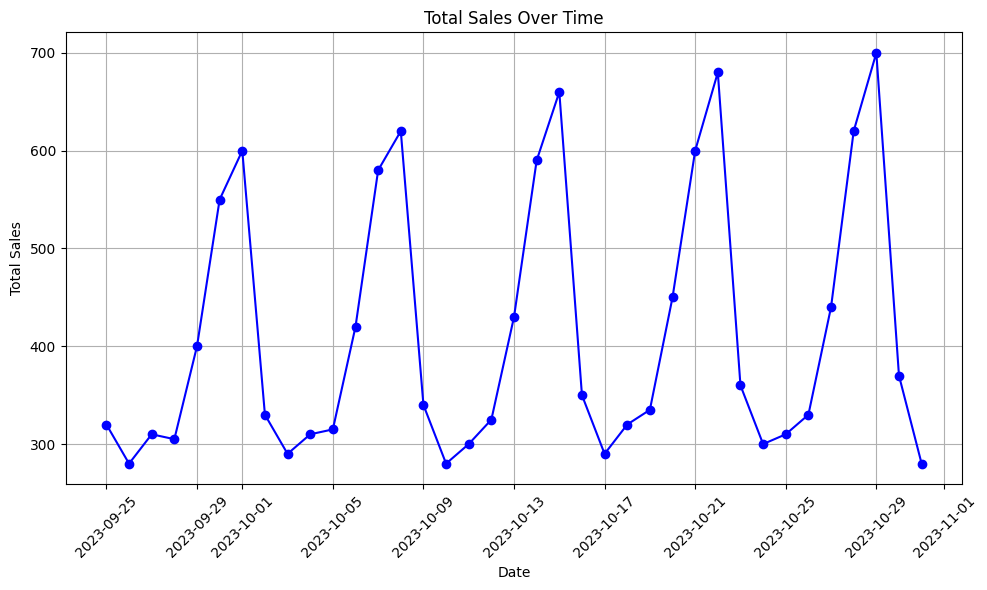

In [ ]:
# visualize it
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(
    df_sales["date"], df_sales["total_sales"], marker="o", linestyle="-", color="b"
)

plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<a id='3'></a>

## 2. Example 4: Generating Edge Cases for a Weather Dataset


In [ ]:
# Create a standard weather dataset
weather_data = pd.DataFrame(
    {
        "date": pd.date_range(start="2023-01-01", periods=100),
        "temperature": np.random.uniform(0, 30, 100),
        "precipitation": np.random.uniform(0, 50, 100),
        "wind_speed": np.random.uniform(0, 20, 100),
    }
)

print(weather_data.head())
print(
    f"\nTemperature range: {weather_data['temperature'].min():.2f} to {weather_data['temperature'].max():.2f}"
)
print(
    f"Precipitation range: {weather_data['precipitation'].min():.2f} to {weather_data['precipitation'].max():.2f}"
)
print(
    f"Wind speed range: {weather_data['wind_speed'].min():.2f} to {weather_data['wind_speed'].max():.2f}"
)

        date  temperature  precipitation  wind_speed
0 2023-01-01    28.139829      26.438379   10.533599
1 2023-01-02    27.078173      35.053954    7.081244
2 2023-01-03    16.110339      45.783627    7.583483
3 2023-01-04     7.164627      15.155273    7.537037
4 2023-01-05    26.635243      10.967279   12.456146

Temperature range: 0.21 to 29.99
Precipitation range: 0.05 to 48.92
Wind speed range: 0.31 to 19.89


In [ ]:
# Use Gen AI to generate edge cases for weather data
prompt = "Generate 5 edge cases for a weather dataset with temperature (°C), precipitation (mm), and wind speed (m/s). Include extreme but plausible values. Output in JSON form"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

edge_cases = json.loads(response.choices[0].message.content)
pprint(edge_cases)

{'edge_cases': [{'precipitation': 0, 'temperature': -50, 'wind_speed': 0},
                {'precipitation': 200, 'temperature': 60, 'wind_speed': 30},
                {'precipitation': 0, 'temperature': 40, 'wind_speed': 50},
                {'precipitation': 300, 'temperature': -30, 'wind_speed': 20},
                {'precipitation': 100, 'temperature': 25, 'wind_speed': 100}]}


In [ ]:
# Add edge cases to the weather dataset
for case in get_first_value(edge_cases):
    new_row = {
        "date": pd.Timestamp.now(),
        "temperature": case["temperature"],
        "precipitation": case["precipitation"],
        "wind_speed": case["wind_speed"],
    }
    new_row_df = pd.DataFrame([new_row])
    weather_data = pd.concat([weather_data, new_row_df], ignore_index=True)

print(weather_data.tail())
print(
    f"\nUpdated temperature range: {weather_data['temperature'].min():.2f} to {weather_data['temperature'].max():.2f}"
)
print(
    f"Updated precipitation range: {weather_data['precipitation'].min():.2f} to {weather_data['precipitation'].max():.2f}"
)
print(
    f"Updated wind speed range: {weather_data['wind_speed'].min():.2f} to {weather_data['wind_speed'].max():.2f}"
)

                          date  temperature  precipitation  wind_speed
100 2025-04-26 18:11:17.864989        -50.0            0.0         0.0
101 2025-04-26 18:11:17.866988         60.0          200.0        30.0
102 2025-04-26 18:11:17.867445         40.0            0.0        50.0
103 2025-04-26 18:11:17.867445        -30.0          300.0        20.0
104 2025-04-26 18:11:17.867445         25.0          100.0       100.0

Updated temperature range: -50.00 to 60.00
Updated precipitation range: 0.00 to 300.00
Updated wind speed range: 0.00 to 100.00


## 2. Example 5: Creating a Sample DataFrame with PII


In [ ]:
data = {
    "Name": ["John Doe", "Jane Smith", "Bob Johnson"],
    "Email": ["john@example.com", "jane@example.com", "bob@example.com"],
    "Phone": ["123-456-7890", "234-567-8901", "345-678-9012"],
    "Age": [30, 25, 45],
    "Salary": [50000, 60000, 75000],
}

df = pd.DataFrame(data)
print(df)

          Name             Email         Phone  Age  Salary
0     John Doe  john@example.com  123-456-7890   30   50000
1   Jane Smith  jane@example.com  234-567-8901   25   60000
2  Bob Johnson   bob@example.com  345-678-9012   45   75000


In [ ]:
prompt = f"""Mask the following PII data. Keep the Age and Salary as is. Output in JSON form.
Original data:
{df.to_json(orient='records')}
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

masked_data = json.loads(response.choices[0].message.content)
masked_df = pd.DataFrame(get_first_value(masked_data))
print(masked_df)

           Name        Email        Phone  Age  Salary
0         *****  ***********  ***********   30   50000
1     *********  ***********  ***********   25   60000
2  ************  ***********  ***********   45   75000


In [ ]:
prompt = f"""Generate synthetic data similar to the following, but with different PII. Keep the Age and Salary distributions similar. Output in JSON form.
Original data:
{df.to_json(orient='records')}
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}],
    response_format={"type": "json_object"},
)

synthetic_data = json.loads(response.choices[0].message.content)
synthetic_df = pd.DataFrame(get_first_value(synthetic_data))
print(synthetic_df)

             Name                Email         Phone  Age  Salary
0     Alice Brown    alice@example.com  987-654-3210   32   52000
1  Michael Wilson  michael@example.com  876-543-2109   28   58000
2      Emma Davis     emma@example.com  765-432-1098   47   80000


In [ ]:
pii_text = "My name is Henry and I live in Toronto and I was having trouble accessing my bank account (account ID: 125526). \
    Could you please help me?"

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": "Remove any PII from the following text, replace it with *: {}".format(
                pii_text
            ),
        }
    ],
)

print(response.choices[0].message.content)

My name is * and I live in * and I was having trouble accessing my bank account (account ID: *****). Could you please help me?


## 2. Example 6: Generating Synthetic Samples for an Imbalanced Dataset


In [ ]:
import pandas as pd
import numpy as np

# Create an unbalanced dataset of product reviews
positive_reviews = [
    "This product is amazing! I love it!",
    "Great quality and fast shipping.",
    "Exceeded my expectations. Highly recommended!",
    "Best purchase I've made in years.",
    "Fantastic product, will buy again.",
]

negative_reviews = ["Disappointed with the quality."]

reviews = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

df = pd.DataFrame({"review": reviews, "sentiment": labels})
print(df)
print(f"\nClass distribution:\n{df['sentiment'].value_counts()}")

                                          review  sentiment
0            This product is amazing! I love it!          1
1               Great quality and fast shipping.          1
2  Exceeded my expectations. Highly recommended!          1
3              Best purchase I've made in years.          1
4             Fantastic product, will buy again.          1
5                 Disappointed with the quality.          0

Class distribution:
sentiment
1    5
0    1
Name: count, dtype: int64


In [ ]:
# Function to generate negative reviews
def generate_negative_review():
    response = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant that generates product reviews.",
            },
            {
                "role": "user",
                "content": "Generate a negative product review similar to these negative reviews: {}. Output in JSON form.".format(
                    negative_reviews
                ),
            },
        ],
        response_format={"type": "json_object"},
    )
    return get_first_value(json.loads(response.choices[0].message.content))


# Generate additional negative reviews
num_to_generate = len(positive_reviews) - len(negative_reviews)
new_negative_reviews = [generate_negative_review() for _ in range(num_to_generate)]

# Add new negative reviews to the dataset
new_data = pd.DataFrame(
    {"review": new_negative_reviews, "sentiment": [0] * len(new_negative_reviews)}
)
df_balanced = pd.concat([df, new_data], ignore_index=True)

print(df_balanced)
print(f"\nNew class distribution:\n{df_balanced['sentiment'].value_counts()}")

                                              review  sentiment
0                This product is amazing! I love it!          1
1                   Great quality and fast shipping.          1
2      Exceeded my expectations. Highly recommended!          1
3                  Best purchase I've made in years.          1
4                 Fantastic product, will buy again.          1
5                     Disappointed with the quality.          0
6  I was really let down by the quality of this p...          0
7  I was really let down by this product. It just...          0
8  I was really let down by the performance of th...          0
9  The product did not meet my expectations at al...          0

New class distribution:
sentiment
1    5
0    5
Name: count, dtype: int64


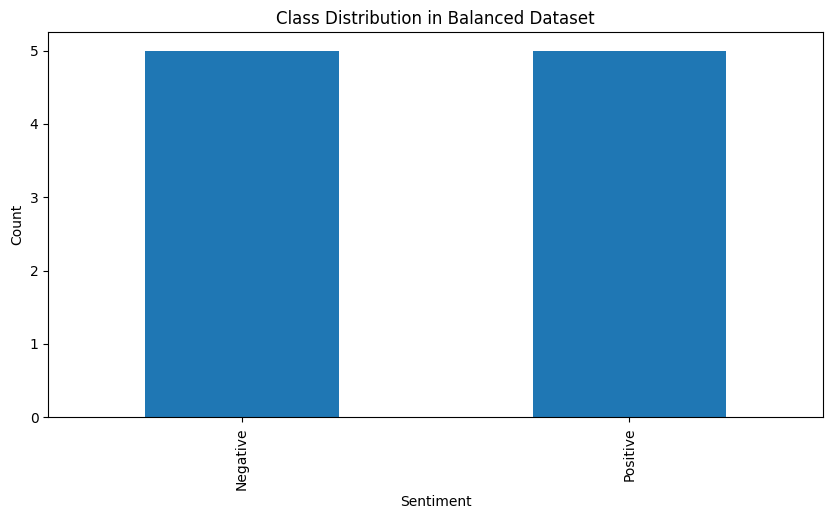

Sample of generated negative reviews:
5                       Disappointed with the quality.
6    I was really let down by the quality of this p...
7    I was really let down by this product. It just...
8    I was really let down by the performance of th...
9    The product did not meet my expectations at al...
Name: review, dtype: object


In [ ]:
# Visualize class distribution
plt.figure(figsize=(10, 5))
df_balanced["sentiment"].value_counts().plot(kind="bar")
plt.title("Class Distribution in Balanced Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks([0, 1], ["Negative", "Positive"])
plt.show()

# Display some generated negative reviews
print("Sample of generated negative reviews:")
print(df_balanced[df_balanced["sentiment"] == 0]["review"].head())

<a id='references'></a>

## 3. References and Further Reading

1. OpenAI API Documentation: https://platform.openai.com/docs/
2. "Synthetic Data for Deep Learning" by Sergey I. Nikolenko
3. "The Synthetic Data Vault" by Neha Patki et al.
4. "Data Augmentation in Time Series Domain" by Eamonn Keogh and Jessica Lin
5. "Generative AI: A Creative New World" by McKinsey & Company
